In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import logging
import pandas as pd
import numpy as np
from numpy import random
#import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

import re
from bs4 import BeautifulSoup
%matplotlib inline



In [16]:
df = pd.read_csv('google-maps-single-dataset-for-conference.csv',encoding='ISO-8859-1')
df = df[pd.notnull(df['Rationale_Type'])]
df = df.replace("issue ", "issue")
print(df.Rationale_Type.value_counts())
#print(df.head(10))
#print(df['comment_Text'].apply(lambda x: len(x.split(' '))).sum())

claim      2076
feature     667
issue       308
Name: Rationale_Type, dtype: int64


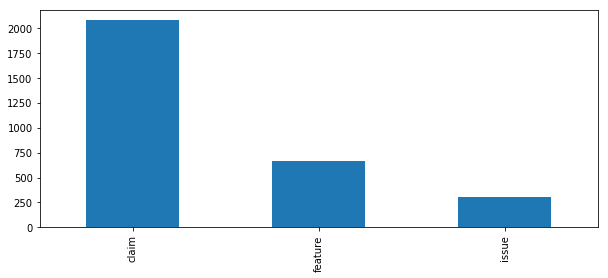

In [17]:
my_tags = ['new feature','claim','issue']
plt.figure(figsize=(10,4))
df.Rationale_Type.value_counts().plot(kind='bar');

In [18]:
X = df['comment_Text'].values.astype('U')
y = df['Rationale_Type'].values.astype('U')
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
#print(len(X_train))
#print(len(X_test))
#x = v.fit_transform(df['Review'].values.astype('U'))

In [19]:
#added extra
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    #fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    #predictions the labels on validation dataset
    predictions= classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions= predictions.argmax(axis= -1)
        
    return predictions

In [20]:
#Kfold classification for NBM, SVM, LR and RF using countvectorizor

kf= KFold(n_splits=10)
#curr_fold= 0
alg_accurcy_NBM =[]
alg_accurcy_SVM =[]
alg_accurcy_LR =[]
alg_accurcy_RF =[]

score_array_NBM= []
score_array_SVM= []
score_array_LR= []
score_array_RF= []
for train_idx, test_idx in kf.split(X):
    X_train, X_test= X[train_idx], X[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    vect= CountVectorizer(max_features=1000, binary=True)
    X_train_vect= vect.fit_transform(X_train)
    X_test_vect = vect.transform(X_test)
    sm= SMOTE()
    X_train_res, y_train_res= sm.fit_sample(X_train_vect, y_train)
    predictions = train_model(naive_bayes.MultinomialNB(),X_train_res,y_train_res,X_test_vect)
    alg_accurcy_NBM.append(accuracy_score(predictions, y_test))
    score_array_NBM.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(svm.SVC(),X_train_res,y_train_res,X_test_vect)
    alg_accurcy_SVM.append(accuracy_score(predictions, y_test))
    score_array_SVM.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(linear_model.LogisticRegression(),X_train_res,y_train_res,X_test_vect)
    alg_accurcy_LR.append(accuracy_score(predictions, y_test))
    score_array_LR.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(ensemble.RandomForestClassifier(),X_train_res,y_train_res,X_test_vect)
    alg_accurcy_RF.append(accuracy_score(predictions, y_test))
    score_array_RF.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))

average_accuracy_NBM= np.mean(alg_accurcy_NBM, axis=0)
print("the average accuracy of NBM is",average_accuracy_NBM)

average_accuracy_SVM= np.mean(alg_accurcy_SVM, axis=0)
print("the average accuracy of SVM is",average_accuracy_SVM)

average_accuracy_LR= np.mean(alg_accurcy_LR, axis=0)
print("the average accuracy of LR is",average_accuracy_LR)

average_accuracy_RF= np.mean(alg_accurcy_RF, axis=0)
print("the average accuracy of RF is",average_accuracy_RF)
    
average_scire_NBM=np.mean(score_array_NBM, axis=0)
print(average_scire_NBM)

average_scire_SVM=np.mean(score_array_SVM, axis=0)
print(average_scire_SVM)

average_scire_LR=np.mean(score_array_LR, axis=0)
print(average_scire_LR)

average_scire_RF=np.mean(score_array_RF, axis=0)
print(average_scire_RF)


the average accuracy of NBM is 0.6090024643737277
the average accuracy of SVM is 0.44544090860387875
the average accuracy of LR is 0.5798242794385514
the average accuracy of RF is 0.5863720132861887
[[  0.7898459    0.41812119   0.25866288]
 [  0.65409143   0.54501044   0.40298191]
 [  0.71392954   0.46729119   0.31107285]
 [207.6         66.7         30.8       ]]
[[6.93016003e-01 3.65093307e-01 1.29328672e-01]
 [5.28683288e-01 1.56175154e-01 5.05222330e-01]
 [5.95645480e-01 2.16665684e-01 2.03542110e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]
[[7.68133521e-01 4.14849418e-01 2.06604863e-01]
 [6.24274075e-01 5.12156463e-01 3.66367328e-01]
 [6.87771431e-01 4.54597861e-01 2.58425728e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]
[[7.05096293e-01 3.43082561e-01 1.55023130e-01]
 [7.52079864e-01 2.49421416e-01 1.79850193e-01]
 [7.26535383e-01 2.86199477e-01 1.63181490e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]


In [21]:
#Kfold classification for NBM, SVM, LR and RF using TFIDF

kf= KFold(n_splits=10)
#curr_fold= 0
alg_accurcy_NBM_tfidf =[]
alg_accurcy_SVM_tfidf =[]
alg_accurcy_LR_tfidf =[]
alg_accurcy_RF_tfidf =[]



#x_train_tfidf

score_array_NBM_tfidf= []
score_array_SVM_tfidf= []
score_array_LR_tfidf= []
score_array_RF_tfidf= []
for train_idx, test_idx in kf.split(X):
    X_train, X_test= X[train_idx], X[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    tfidf_vect= TfidfVectorizer(analyzer='word', token_pattern= r'\w{1,}', max_features=5000)
    tfidf_vect.fit(X_train)
    x_train_tfidf=tfidf_vect.transform(X_train)
    x_test_tfidf=tfidf_vect.transform(X_test)
    sm= SMOTE()
    X_train_res_tfidf, y_train_res_tfidf= sm.fit_sample(x_train_tfidf, y_train)
    predictions = train_model(naive_bayes.MultinomialNB(),X_train_res_tfidf,y_train_res_tfidf,x_test_tfidf)
    alg_accurcy_NBM_tfidf.append(accuracy_score(predictions, y_test))
    score_array_NBM_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(svm.SVC(),X_train_res_tfidf,y_train_res_tfidf,x_test_tfidf)
    alg_accurcy_SVM_tfidf.append(accuracy_score(predictions, y_test))
    score_array_SVM_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(linear_model.LogisticRegression(),X_train_res_tfidf,y_train_res_tfidf,x_test_tfidf)
    alg_accurcy_LR_tfidf.append(accuracy_score(predictions, y_test))
    score_array_LR_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(ensemble.RandomForestClassifier(),X_train_res_tfidf,y_train_res_tfidf,x_test_tfidf)
    alg_accurcy_RF_tfidf.append(accuracy_score(predictions, y_test))
    score_array_RF_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))

average_accuracy_NBM_tfidf= np.mean(alg_accurcy_NBM_tfidf, axis=0)
print("the average accuracy of NBM is",average_accuracy_NBM_tfidf)

average_accuracy_SVM_tfidf= np.mean(alg_accurcy_SVM_tfidf, axis=0)
print("the average accuracy of SVM is",average_accuracy_SVM_tfidf)

average_accuracy_LR_tfidf= np.mean(alg_accurcy_LR_tfidf, axis=0)
print("the average accuracy of LR is",average_accuracy_LR_tfidf)

average_accuracy_RF_tfidf= np.mean(alg_accurcy_RF_tfidf, axis=0)
print("the average accuracy of RF is",average_accuracy_RF_tfidf)
    
average_scire_NBM_tfidf=np.mean(score_array_NBM_tfidf, axis=0)
print(average_scire_NBM_tfidf)

average_scire_SVM_tfidf=np.mean(score_array_SVM_tfidf, axis=0)
print(average_scire_SVM_tfidf)

average_scire_LR_tfidf=np.mean(score_array_LR_tfidf, axis=0)
print(average_scire_LR_tfidf)

average_scire_RF_tfidf=np.mean(score_array_RF_tfidf, axis=0)
print(average_scire_RF_tfidf)

the average accuracy of NBM is 0.5440897889210329
the average accuracy of SVM is 0.6928790313939784
the average accuracy of LR is 0.6558630665380906
the average accuracy of RF is 0.6519114968391728
[[  0.8304317    0.3740099    0.23163931]
 [  0.51034187   0.6788862    0.41054305]
 [  0.62820908   0.47484691   0.29257829]
 [207.6         66.7         30.8       ]]
[[7.24512215e-01 5.44302755e-01 3.68618904e-01]
 [9.27993522e-01 1.93698739e-01 1.32952386e-01]
 [8.10316196e-01 2.26043158e-01 1.83013566e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]
[[  0.81758993   0.49433542   0.26672169]
 [  0.70838805   0.59021739   0.39099197]
 [  0.75778966   0.52964632   0.31357865]
 [207.6         66.7         30.8       ]]
[[7.28029696e-01 4.24134645e-01 2.70648651e-01]
 [8.31382513e-01 3.24751927e-01 1.45068067e-01]
 [7.74132026e-01 3.60317711e-01 1.81017752e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]


In [22]:
#Kfold classification for NBM, SVM, LR and RF using TFIDF-ngram with analizer= 'word' and ngram=1-3

kf= KFold(n_splits=10)
#curr_fold= 0
alg_accurcy_NBM_tfidf_W_ngram =[]
alg_accurcy_SVM_tfidf_W_ngram =[]
alg_accurcy_LR_tfidf_W_ngram =[]
alg_accurcy_RF_tfidf_W_ngram =[]



#x_train_tfidf

score_array_NBM_tfidf_W_ngram= []
score_array_SVM_tfidf_W_ngram= []
score_array_LR_tfidf_W_ngram= []
score_array_RF_tfidf_W_ngram= []
for train_idx, test_idx in kf.split(X):
    X_train, X_test= X[train_idx], X[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    
    tfidf_vect_ngram= TfidfVectorizer(analyzer='word', token_pattern= r'\w{1,}', ngram_range=(1,3), max_features=5000)
    tfidf_vect_ngram.fit(X_train)
    x_train_ngram=tfidf_vect_ngram.transform(X_train)
    x_test_ngram=tfidf_vect_ngram.transform(X_test)
    
    sm= SMOTE()
    X_train_res_tfidf_ngram, y_train_res_tfidf_ngram= sm.fit_sample(x_train_ngram, y_train)

    
    predictions = train_model(naive_bayes.MultinomialNB(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
    alg_accurcy_NBM_tfidf_W_ngram.append(accuracy_score(predictions, y_test))
    score_array_NBM_tfidf_W_ngram.append(precision_recall_fscore_support(y_test,predictions, average=None))
    
    predictions = train_model(svm.SVC(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
    alg_accurcy_SVM_tfidf_W_ngram.append(accuracy_score(predictions, y_test))
    score_array_SVM_tfidf_W_ngram.append(precision_recall_fscore_support(y_test,predictions, average=None))
    
    predictions = train_model(linear_model.LogisticRegression(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
    alg_accurcy_LR_tfidf_W_ngram.append(accuracy_score(predictions, y_test))
    score_array_LR_tfidf_W_ngram.append(precision_recall_fscore_support(y_test,predictions, average=None))
    
    predictions = train_model(ensemble.RandomForestClassifier(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
    alg_accurcy_RF_tfidf_W_ngram.append(accuracy_score(predictions, y_test))
    score_array_RF_tfidf_W_ngram.append(precision_recall_fscore_support(y_test,predictions, average=None))

average_accuracy_NBM_tfidf_W_ngram= np.mean(alg_accurcy_NBM_tfidf_W_ngram, axis=0)
print("the average accuracy of NBM is",average_accuracy_NBM_tfidf_W_ngram)

average_accuracy_SVM_tfidf_W_ngram= np.mean(alg_accurcy_SVM_tfidf_W_ngram, axis=0)
print("the average accuracy of SVM is",average_accuracy_SVM_tfidf_W_ngram)

average_accuracy_LR_tfidf_W_ngram= np.mean(alg_accurcy_LR_tfidf_W_ngram, axis=0)
print("the average accuracy of LR is",average_accuracy_LR_tfidf_W_ngram)

average_accuracy_RF_tfidf_W_ngram= np.mean(alg_accurcy_RF_tfidf_W_ngram, axis=0)
print("the average accuracy of RF is",average_accuracy_RF_tfidf_W_ngram)
    
average_scire_NBM_tfidf_W_ngram=np.mean(score_array_NBM_tfidf_W_ngram, axis=0)
print(average_scire_NBM_tfidf_W_ngram)

average_scire_SVM_tfidf_W_ngram=np.mean(score_array_SVM_tfidf_W_ngram, axis=0)
print(average_scire_SVM_tfidf_W_ngram)

average_scire_LR_tfidf_W_ngram=np.mean(score_array_LR_tfidf_W_ngram, axis=0)
print(average_scire_LR_tfidf_W_ngram)

average_scire_RF_tfidf_W_ngram=np.mean(score_array_RF_tfidf_W_ngram, axis=0)
print(average_scire_RF_tfidf_W_ngram)

the average accuracy of NBM is 0.6270213221900783
the average accuracy of SVM is 0.7046758812814744
the average accuracy of LR is 0.6738862102217936
the average accuracy of RF is 0.6764963034394086
[[  0.80474553   0.45945649   0.25700409]
 [  0.66569744   0.5706636    0.42532253]
 [  0.72736417   0.50188116   0.31788387]
 [207.6         66.7         30.8       ]]
[[7.14715630e-01 7.29616013e-01 4.08582916e-01]
 [9.56558659e-01 1.35984919e-01 1.91756775e-01]
 [8.16621943e-01 2.11690059e-01 2.49375240e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]
[[  0.80838834   0.4824616    0.34438654]
 [  0.74065483   0.56173773   0.41185349]
 [  0.77217195   0.51364985   0.36935123]
 [207.6         66.7         30.8       ]]
[[7.31677333e-01 4.61607504e-01 2.53886166e-01]
 [8.73389310e-01 3.04440812e-01 1.28610818e-01]
 [7.95249014e-01 3.62079170e-01 1.65182496e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]


In [23]:
#Kfold classification for NBM, SVM, LR and RF using TFIDF-ngram with analizer= 'char' and ngram=1-3

kf= KFold(n_splits=10)
#curr_fold= 0
alg_accurcy_NBM_C_tfidf =[]
alg_accurcy_SVM_C_tfidf =[]
alg_accurcy_LR_C_tfidf =[]
alg_accurcy_RF_C_tfidf =[]



#x_train_tfidf

score_array_NBM_C_tfidf= []
score_array_SVM_C_tfidf= []
score_array_LR_C_tfidf= []
score_array_RF_C_tfidf= []
for train_idx, test_idx in kf.split(X):
    X_train, X_test= X[train_idx], X[test_idx]
    y_train, y_test= y[train_idx], y[test_idx]
    tfidf_vect_ngram_chars= TfidfVectorizer(analyzer='char', token_pattern= r'\w{1,}', ngram_range=(2,3), max_features=5000)
    tfidf_vect_ngram_chars.fit(X_train)
    x_train_ngram_char=tfidf_vect_ngram_chars.transform(X_train)
    x_test_ngram_char=tfidf_vect_ngram_chars.transform(X_test)
    sm= SMOTE()
    X_train_res_tfidf_ngram_char, y_train_res_tfidf_ngram_char= sm.fit_sample(x_train_ngram_char, y_train)
    
    predictions = train_model(naive_bayes.MultinomialNB(),X_train_res_tfidf_ngram_char,y_train_res_tfidf_ngram_char,x_test_ngram_char)
    alg_accurcy_NBM_C_tfidf.append(accuracy_score(predictions, y_test))
    score_array_NBM_C_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(svm.SVC(),X_train_res_tfidf_ngram_char,y_train_res_tfidf_ngram_char,x_test_ngram_char)
    alg_accurcy_SVM_C_tfidf.append(accuracy_score(predictions, y_test))
    score_array_SVM_C_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(linear_model.LogisticRegression(),X_train_res_tfidf_ngram_char,y_train_res_tfidf_ngram_char,x_test_ngram_char)
    alg_accurcy_LR_C_tfidf.append(accuracy_score(predictions, y_test))
    score_array_LR_C_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))
    
    predictions = train_model(ensemble.RandomForestClassifier(),X_train_res_tfidf_ngram_char,y_train_res_tfidf_ngram_char,x_test_ngram_char)
    alg_accurcy_RF_C_tfidf.append(accuracy_score(predictions, y_test))
    score_array_RF_C_tfidf.append(precision_recall_fscore_support(y_test,predictions, average=None))
    #print(classification_report(y_test, predictions,target_names=my_tags))

average_accuracy_NBM_C_tfidf= np.mean(alg_accurcy_NBM_C_tfidf, axis=0)
print("the average accuracy of NBM is",average_accuracy_NBM_C_tfidf)

average_accuracy_SVM_C_tfidf= np.mean(alg_accurcy_SVM_C_tfidf, axis=0)
print("the average accuracy of SVM is",average_accuracy_SVM_C_tfidf)

average_accuracy_LR_C_tfidf= np.mean(alg_accurcy_LR_C_tfidf, axis=0)
print("the average accuracy of LR is",average_accuracy_LR_C_tfidf)

average_accuracy_RF_C_tfidf= np.mean(alg_accurcy_RF_C_tfidf, axis=0)
print("the average accuracy of RF is",average_accuracy_RF_C_tfidf)
    
average_scire_NBM_C_tfidf=np.mean(score_array_NBM_C_tfidf, axis=0)
print(average_scire_NBM_C_tfidf)

average_scire_SVM_C_tfidf=np.mean(score_array_SVM_C_tfidf, axis=0)
print(average_scire_SVM_tfidf)

average_scire_LR_C_tfidf=np.mean(score_array_LR_C_tfidf, axis=0)
print(average_scire_LR_C_tfidf)

average_scire_RF_C_tfidf=np.mean(score_array_RF_C_tfidf, axis=0)
print(average_scire_RF_C_tfidf)

the average accuracy of NBM is 0.5689842494374798
the average accuracy of SVM is 0.5656991321118611
the average accuracy of LR is 0.6640522875816993
the average accuracy of RF is 0.6443790849673203
[[  0.83562737   0.38362572   0.2915371 ]
 [  0.53632153   0.63864064   0.58033173]
 [  0.6501667    0.47303927   0.3855659 ]
 [207.6         66.7         30.8       ]]
[[7.24512215e-01 5.44302755e-01 3.68618904e-01]
 [9.27993522e-01 1.93698739e-01 1.32952386e-01]
 [8.10316196e-01 2.26043158e-01 1.83013566e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]
[[  0.81135119   0.46323728   0.36329722]
 [  0.72024925   0.55759654   0.489544  ]
 [  0.76155636   0.49915719   0.41318473]
 [207.6         66.7         30.8       ]]
[[7.16004009e-01 3.73401758e-01 2.82033873e-01]
 [8.36635820e-01 2.71762760e-01 1.31284780e-01]
 [7.70001418e-01 3.09052437e-01 1.73564834e-01]
 [2.07600000e+02 6.67000000e+01 3.08000000e+01]]


In [22]:
#Voting Mechanism

predictions0 = train_model(naive_bayes.MultinomialNB(),X_train_res,y_train_res,X_test_vect)
predictions1 = train_model(svm.SVC(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
predictions2 = train_model(linear_model.LogisticRegression(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
predictions3 = train_model(ensemble.RandomForestClassifier(),X_train_res_tfidf_ngram,y_train_res_tfidf_ngram,x_test_ngram)
#predictions4 = train_model(xgboost.XGBClassifier(),X_train_res.tocsc(),y_train_res,X_test_vect.tocsc())

In [23]:
multi_prediction = [];
for i in range(len(predictions0)):
    temp = []
    temp.append(predictions0[i])
    temp.append(predictions1[i])
    temp.append(predictions2[i])
    temp.append(predictions3[i])
    #temp.append(predictions4[i])
    multi_prediction.append(max(set(temp), key=temp.count))
print('accuracy %s' % accuracy_score(multi_prediction, y_test))
print('f1 %s' % f1_score(multi_prediction, y_test, average='macro'))
print(classification_report(y_test, multi_prediction,target_names=my_tags))

accuracy 0.7394366197183099
f1 0.5186382245205775
              precision    recall  f1-score   support

 new feature       0.74      0.97      0.84        96
       claim       1.00      0.17      0.29        18
       issue       0.64      0.32      0.43        28

   micro avg       0.74      0.74      0.74       142
   macro avg       0.80      0.49      0.52       142
weighted avg       0.76      0.74      0.69       142

